In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from time import sleep
import requests
import json
import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [18]:
options = Options()
options.headless = True
options.add_argument("--window-size=1920,1200")

driver = webdriver.Chrome("/Users/sddjl/Documents/GitHub/DS3-GoFundMe/chromedriver.exe")


In [3]:
mydf = pd.read_csv('GFM_url_list.csv', sep = '\t')
mydf


,Unnamed: 0,Url,Category,Position
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0
1,1,https://www.gofundme.com/f/official-navajo-nat...,Medical,0
2,2,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,0
3,3,https://www.gofundme.com/f/brandon039s-medical...,Medical,1
4,4,https://www.gofundme.com/f/please-help-me-in-t...,Medical,1
...,...,...,...,...
775,775,https://www.gofundme.com/f/breelynnstrong,Wishes,14
776,776,https://www.gofundme.com/f/rebecca-trimble-mak...,Wishes,14
777,777,https://www.gofundme.com/f/help-mr-walter-get-...,Wishes,15
778,778,https://www.gofundme.com/f/Aylas-Fundraiser,Wishes,15


In [4]:
headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donations", "Length_of_Fundraising", "FB_Shares", "Number_of_Donors","Followers", "Text"]
mydf = mydf.reindex(columns = headers)

full_df = pd.DataFrame(columns = headers)
#need to scrape a single url now

In [15]:
def scrape_url(row_index):
    single_row = mydf.iloc[row_index]
    url = single_row["Url"]
    category = single_row["Category"]
    position = single_row["Position"]
    
    driver.get(url)
    text = re.sub('<!-- -->','',driver.page_source)
    soup = BeautifulSoup(text)

    try:
        money_string = soup.find("h2",attrs = {"class": "m-progress-meter-heading"} ).text
        
        time_string = re.sub("Created ", "", soup.find("span",attrs = {"class": "m-campaign-byline-created"} ).text)

        amount_raised = re.sub("[^0-9.]",'',money_string.split(' ')[0])
        
        goal = re.sub("[^0-9.]",'',money_string.split(' ')[3])
        
        NumDonations = soup.find("button", attrs = {"data-element-id": "btn_donations"}).text
        
        timeFundraised = pd.Timestamp.now() - pd.to_datetime(time_string)
    except:
        amount_raised = np.nan
        goal = np.nan
        NumDonations = np.nan
        timeFundraised = np.nan
            
    try:
        title = soup.find("h1", attrs = {"class": "a-campaign-title"}).text
    except:
        title = np.nan
        
    try:
        all_text = soup.find("div", attrs = {"class": "o-campaign-story"}).text
    except:
        all_text = np.nan
    
    try:
        if len(soup.find_all("span", attrs = {"class": "text-stat-value"})) == 0:
            raise IOError
        for idx,i in enumerate(soup.find_all("span", attrs = {"class": "text-stat-value"})[:3]):
            if idx == 0:
                NumDonors = i.text
            if idx == 1:
                FB_shares = i.text
            if idx == 2:
                followers = i.text
    except:
        NumDonors = np.nan
        FB_shares = np.nan
        followers = np.nan
    
    try:
        location = soup.find_all("div", attrs = {"class": "text-small"})[1].text
    except:
        location = np.nan
        
    temp_row = np.array([[url, category, position, title, location, amount_raised, goal, NumDonations, timeFundraised, FB_shares, NumDonors, followers, all_text]])
    temp_df = pd.DataFrame(temp_row, columns = headers)
    
    return(temp_df)

In [16]:
df = pd.DataFrame(columns = headers)
df.to_csv('GFM_data.csv', mode = 'a', sep ='\t')

In [17]:
def scrape_all_urls(file = 'GFM_data.csv', start = 0, end = len(mydf)):
    for i in range(start, end):
        try:
            temp_df = scrape_url(i)
            temp_df.to_csv(file, mode = 'a',sep = '\t', header = False)
            print("Scraping url %s" %(i+1))
        except:
            sleep(5)
            temp_df = scrape_url(i)
            temp_df.to_csv(file, mode = 'a',sep = '\t', header = False)
            print("Scraping url %s" %(i+1))

In [19]:
scrape_all_urls()

Scraping url 1
Scraping url 2
Scraping url 3
Scraping url 4
Scraping url 5
Scraping url 6
Scraping url 7
Scraping url 8
Scraping url 9
Scraping url 10
Scraping url 11
Scraping url 12
Scraping url 13
Scraping url 14
Scraping url 15
Scraping url 16
Scraping url 17
Scraping url 18
Scraping url 19
Scraping url 20
Scraping url 21
Scraping url 22
Scraping url 23
Scraping url 24
Scraping url 25
Scraping url 26
Scraping url 27
Scraping url 28
Scraping url 29
Scraping url 30
Scraping url 31
Scraping url 32
Scraping url 33
Scraping url 34
Scraping url 35
Scraping url 36
Scraping url 37
Scraping url 38
Scraping url 39
Scraping url 40
Scraping url 41
Scraping url 42
Scraping url 43
Scraping url 44
Scraping url 45
Scraping url 46
Scraping url 47
Scraping url 48
Scraping url 49
Scraping url 50
Scraping url 51
Scraping url 52
Scraping url 53
Scraping url 54
Scraping url 55
Scraping url 56
Scraping url 57
Scraping url 58
Scraping url 59
Scraping url 60
Scraping url 61
Scraping url 62
Scraping url 63
S

Scraping url 490
Scraping url 491
Scraping url 492
Scraping url 493
Scraping url 494
Scraping url 495
Scraping url 496
Scraping url 497
Scraping url 498
Scraping url 499
Scraping url 500
Scraping url 501
Scraping url 502
Scraping url 503
Scraping url 504
Scraping url 505
Scraping url 506
Scraping url 507
Scraping url 508
Scraping url 509
Scraping url 510
Scraping url 511
Scraping url 512
Scraping url 513
Scraping url 514
Scraping url 515
Scraping url 516
Scraping url 517
Scraping url 518
Scraping url 519
Scraping url 520
Scraping url 521
Scraping url 522
Scraping url 523
Scraping url 524
Scraping url 525
Scraping url 526
Scraping url 527
Scraping url 528
Scraping url 529
Scraping url 530
Scraping url 531
Scraping url 532
Scraping url 533
Scraping url 534
Scraping url 535
Scraping url 536
Scraping url 537
Scraping url 538
Scraping url 539
Scraping url 540
Scraping url 541
Scraping url 542
Scraping url 543
Scraping url 544
Scraping url 545
Scraping url 546
Scraping url 547
Scraping url 5

In [20]:
df = pd.read_csv('GFM_data.csv', sep = '\t')

In [21]:
df

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2296580.0,3000000.0,72.9K,72 days 00:33:52.072310000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1831590.0,1000000.0,22K,184 days 00:33:53.278684000,71.3K,21.5K,21.6K,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,0,"Rest up, Tommy, we'll see you soon","Raised $105,973 from 1795 donations",652554.0,1000000.0,11K,110 days 00:33:55.164400000,20.8K,10.1K,10.2K,"First, thank you for being here. Tommy Rivers ..."
3,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570299.0,750000.0,24.7K,154 days 00:33:56.151397000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...
4,0,https://www.gofundme.com/f/please-help-me-in-t...,Medical,1,PLEASE HELP ME IN THE BATTLE FOR MY LIFE,"New Milford, NJ",498256.0,600000.0,7.8K,20 days 00:33:59.899292000,6.6K,7.7K,7.9K,PLEASE HELP ME IN THE BATTLE FOR MY LIFE. My n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,https://www.gofundme.com/f/breelynnstrong,Wishes,14,#breelynnstrong,"Jamestown, IN",24374.0,30000.0,420,29 days 00:49:27.598525000,1.4K,418,419,"\n#breelynnstrongDiffuse midline glioma, also ..."
776,0,https://www.gofundme.com/f/rebecca-trimble-mak...,Wishes,14,"Rebecca Trimble - Make America ""Home"" - Legal ...","Bethel, AK",24162.0,25000.0,275,120 days 00:49:28.630604000,2.6K,272,274,A Woman Without A Country - New York Times Art...
777,0,https://www.gofundme.com/f/help-mr-walter-get-...,Wishes,15,(TEMP. ON PAUSE) Help Mr Walter get A NEW HOME!!,"Tallahassee, FL",23565.0,100000.0,1.1K,121 days 00:49:29.620155000,3.9K,1.1K,1.1K,***EDIT: This fundraiser is temporarily on pau...
778,0,https://www.gofundme.com/f/Aylas-Fundraiser,Wishes,15,Ayla’s Fundraiser,"North Grafton, MA",22825.0,1000.0,352,72 days 00:49:30.676767000,1.7K,347,349,My niece Megan was recently taken from us and ...


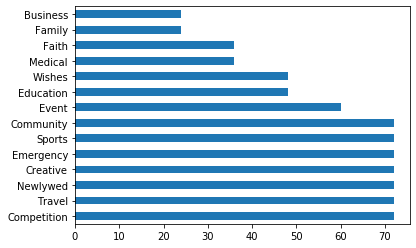

In [25]:
df['Category'].value_counts().plot(kind = 'barh')

In [23]:
df['Followers'].value_counts()

1.7K    11
1.1K    10
25      10
26       9
1.2K     9
        ..
985      1
613      1
353      1
692      1
463      1
Name: Followers, Length: 406, dtype: int64

In [24]:
df['Followers'].isna().sum()

21

In [26]:
df.isna().sum()

Unnamed: 0                0
Url                       0
Category                  0
Position                  0
Title                     1
Location                  3
Amount_Raised            29
Goal                     29
Number_of_Donations      29
Length_of_Fundraising    29
FB_Shares                21
Number_of_Donors         21
Followers                21
Text                      8
dtype: int64

In [27]:
(df.loc[df['Title'].isna()])['Url']

668    https://www.gofundme.com/f/7rjmw-birthday
Name: Url, dtype: object